## Analysis of an E-commerce Dataset Part 1

We have been provided with a combined e-commerce dataset. In this dataset, each user has the ability to post a rating and review for the products they purchased. Additionally, other users can evaluate the initial rating and review by expressing their trust or distrust.

This dataset includes a wealth of information for each user. Details such as their profile, ID, gender, city of birth, product ratings (on a scale of 1-5), reviews, and the prices of the products they purchased are all included. Moreover, for each product rating, we have information about the product name, ID, price, and category, the rating score, the timestamp of the rating and review, and the average helpfulness of the rating given by others (on a scale of 1-5).

The dataset is from several data sources, and we have merged all the data into a single CSV file named 'A Combined E-commerce Dataset.csv'. The structure of this dataset is represented in the header shown below.

| userId | gender | rating | review| item | category | helpfulness | timestamp | item_id | item_price | user_city|

    | ---- | ---- | ---- | ---- | ---- | ---- | ---- | ---- | ---- |  ---- |  ---- |  
    
#### Description of Fields

* __userId__ - the user's id
* __gender__ - the user's gender
* __rating__ - the user's rating towards the item
* __review__ - the user's review towards the item
* __item__ - the item's name
* __category__ - the category of the item
* __helpfulness__ - the average helpfulness of this rating
* __timestamp__ - the timestamp when the rating is created
* __item_id__ - the item's id
* __item_price__ - the item's price
* __user_city__ - the city of user's birth

Note that, a user may rate multiple items and an item may receive ratings and reviews from multiple users. The "helpfulness" is an average value based on all the helpfulness values given by others.

There are four questions to explore with the data as shown below.



<img src="data-relation.png" align="left" width="400"/>
(You can find the data relation diagram on iLearn - Portfolio Part 1 resources - Fig1)


In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

/opt/anaconda3/lib/python3.9/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (
/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
df1 = pd.read_csv("The E-commerce Dataset.csv")

 ### Q1. Remove missing data

Please remove the following records in the csv file:

 * gender/rating/helpfulness is missing
 * review is 'none'

__Display the DataFrame, counting number of Null values in each column, and print the length of the data__ before and after removing the missing data.  

#### Before removing the missing data: 

Display of the DataFrame

In [3]:
df1

,userId,timestamp,review,item,rating,helpfulness,gender,category,item_id,item_price,user_city
0,4051,12807,Great job for what it is!,eBay,5.0,2.0,F,Online Stores & Services,88,149.00,39
1,4052,122899,Free Access Worth your Time,NetZero,5.0,0.0,F,Online Stores & Services,46,53.00,39
2,33,12700,AOL..I love you!!!!!!!!!!!!,AOL (America Online),5.0,4.0,F,Online Stores & Services,0,145.84,31
3,33,21000,EBAY!!! I LOVE YOU!!!! :-)*,eBay,5.0,4.0,F,Online Stores & Services,88,149.00,31
4,33,22300,Blair Witch...Oh Come On.......,Blair Witch Project,1.0,4.0,F,Movies,12,44.00,31
...,...,...,...,...,...,...,...,...,...,...,...
19995,10805,50600,The Upper Class Fast Food,Wendy's,2.0,3.0,F,Restaurants & Gourmet,84,69.00,18
19996,10806,82201,What more can you ask for????,Olive Garden,4.0,0.0,M,Restaurants & Gourmet,49,32.00,28
19997,10806,82201,Excellent steak for a good price,Outback Steakhouse,4.0,3.0,M,Restaurants & Gourmet,50,25.00,28
19998,10807,31504,Different story world,J. K. Rowling - Harry Potter and the Sorcerer'...,4.0,0.0,M,Books,36,96.00,27


In [4]:
df1.isnull().sum(axis = 0)

userId          0
timestamp       0
review          0
item            0
rating         17
helpfulness    22
gender         27
category        0
item_id         0
item_price      0
user_city       0
dtype: int64

In [5]:
print(len(df1))

20000


#### Removing missing data in gender/rating/helpfulness

In [6]:
df2= df1.dropna()
df2

,userId,timestamp,review,item,rating,helpfulness,gender,category,item_id,item_price,user_city
0,4051,12807,Great job for what it is!,eBay,5.0,2.0,F,Online Stores & Services,88,149.00,39
1,4052,122899,Free Access Worth your Time,NetZero,5.0,0.0,F,Online Stores & Services,46,53.00,39
2,33,12700,AOL..I love you!!!!!!!!!!!!,AOL (America Online),5.0,4.0,F,Online Stores & Services,0,145.84,31
3,33,21000,EBAY!!! I LOVE YOU!!!! :-)*,eBay,5.0,4.0,F,Online Stores & Services,88,149.00,31
4,33,22300,Blair Witch...Oh Come On.......,Blair Witch Project,1.0,4.0,F,Movies,12,44.00,31
...,...,...,...,...,...,...,...,...,...,...,...
19995,10805,50600,The Upper Class Fast Food,Wendy's,2.0,3.0,F,Restaurants & Gourmet,84,69.00,18
19996,10806,82201,What more can you ask for????,Olive Garden,4.0,0.0,M,Restaurants & Gourmet,49,32.00,28
19997,10806,82201,Excellent steak for a good price,Outback Steakhouse,4.0,3.0,M,Restaurants & Gourmet,50,25.00,28
19998,10807,31504,Different story world,J. K. Rowling - Harry Potter and the Sorcerer'...,4.0,0.0,M,Books,36,96.00,27


#### Removing missing data where review is 'none'

In [7]:
df2.replace('none', np.nan, inplace = True)

/var/folders/8t/glsx5ls50qqbbbhkvwpkhdnc0000gn/T/ipykernel_7694/752617794.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.replace('none', np.nan, inplace = True)


In [8]:
df3 = df2.dropna()

In [9]:
df3

,userId,timestamp,review,item,rating,helpfulness,gender,category,item_id,item_price,user_city
0,4051,12807,Great job for what it is!,eBay,5.0,2.0,F,Online Stores & Services,88,149.00,39
1,4052,122899,Free Access Worth your Time,NetZero,5.0,0.0,F,Online Stores & Services,46,53.00,39
2,33,12700,AOL..I love you!!!!!!!!!!!!,AOL (America Online),5.0,4.0,F,Online Stores & Services,0,145.84,31
3,33,21000,EBAY!!! I LOVE YOU!!!! :-)*,eBay,5.0,4.0,F,Online Stores & Services,88,149.00,31
4,33,22300,Blair Witch...Oh Come On.......,Blair Witch Project,1.0,4.0,F,Movies,12,44.00,31
...,...,...,...,...,...,...,...,...,...,...,...
19995,10805,50600,The Upper Class Fast Food,Wendy's,2.0,3.0,F,Restaurants & Gourmet,84,69.00,18
19996,10806,82201,What more can you ask for????,Olive Garden,4.0,0.0,M,Restaurants & Gourmet,49,32.00,28
19997,10806,82201,Excellent steak for a good price,Outback Steakhouse,4.0,3.0,M,Restaurants & Gourmet,50,25.00,28
19998,10807,31504,Different story world,J. K. Rowling - Harry Potter and the Sorcerer'...,4.0,0.0,M,Books,36,96.00,27


#### After removing missing data:

In [10]:
df3.isnull().sum()

userId         0
timestamp      0
review         0
item           0
rating         0
helpfulness    0
gender         0
category       0
item_id        0
item_price     0
user_city      0
dtype: int64

In [11]:
print(len(df3))

19916


#### Analysis Output

The length of the data before removing null is 20,000. There are 17 null values in "rating", 22 null values in "helpfulness" and 27 null values in ""gender". 

The rest of the columns have zero null values.

After removing the missing data, the length of the data is 19,916. 

### Q2. Descriptive statistics

With the cleaned data in Q1, please provide the data summarization as below:

* Q2.1 total number of unique users, unique reviews, unique items, and unique categories
* Q2.2 descriptive statistics, e.g., the total number, mean, std, min and max regarding all rating records
* Q2.3 descriptive statistics, e.g., mean, std, max, and min of the number of items rated by different genders
* Q2.4 descriptive statistics, e.g., mean, std, max, min of the number of ratings that received by each items

#### Q2.1 

In [12]:
users = len(pd.unique(df3['userId']))
users

8562

In [13]:
review = len(pd.unique(df3['review']))
review

19459

In [14]:
item = len(pd.unique(df3['item']))
item

89

In [15]:
category = len(pd.unique(df3['category']))
category

9

#### Analysis Output
There is a total number of 8,562 unique users, 19,456 unique reviews, 89 unique items, and 9 unique categories. 

#### Insights
Each user may have submitted one or more reviews, indicating a diverse user base. The large number of reviews suggests a rich dataset for sentiment analysis, trends over time and overall product feedback. The 89 items represent the variety of products reviewed. Analyzing the reviews by item can reveal which items are most popular, have the highest satisfaction or recurring issues. 

#### Q2.2

In [16]:
df3.rating.describe()

count    19916.000000
mean         3.701798
std          1.404451
min          1.000000
25%          3.000000
50%          4.000000
75%          5.000000
max          5.000000
Name: rating, dtype: float64

#### Analysis Output

The total number of ratings were 19,916 with a mean of 3.7, a standard deviation of 1.4, a minimum rating of 1 and a maximum rating of 5.

#### Interpretation and Insights

The mean rating of 3.7 is closer to the higher end of the rating scale (5), suggesting a positive skew in the distribution. This means that users tend to give higher ratings more frequently than lower ratings. With the median at 4 and the 75th percentile being at 5, it is clear that the majority of the users are satisfied, with many giving the highest rating possible. 

The standard deviation of 1.4 indicates that while most rating cluster around the mean (3.7), there is still a considerable spread, with some users rating as low as 1 and as high as 5. This variability can be attributed to differences in user expectations, experiences and item performance. 

25% of the users rated their experience at 3 or below, which could highlight potential issues or areas of improvement in cerain aspects of the items. 75% of users rated their experience at 5, suggesting high satisfaction levels among a large segment of the user base. 

#### Q2.3

In [36]:
gender_group = df3.groupby("gender").count()["item"]
gender_group

gender
F     9793
M    10123
Name: item, dtype: int64

In [37]:
gender_group.describe()

count        2.000000
mean      9958.000000
std        233.345238
min       9793.000000
25%       9875.500000
50%       9958.000000
75%      10040.500000
max      10123.000000
Name: item, dtype: float64

#### Analysis Output

This output provides information about the counts of items rated by both females and males. The mean number of items rated by the 2 different genders were 9,958, with a standard deviation of 233, minimum times of 9,793 and a maximum number of times of 10,123.

#### Interpretation

There are slightly more males (10,123) than females (9,793) in the dataset. 

#### Q2.4

In [19]:
df_items = df3.groupby("item").count()["rating"]
df_items

item
AOL (America Online)     939
All Advantage            657
Alta Vista (by 1stUp)    157
Amazon.com               240
American Airlines        185
                        ... 
Wendy's                  210
What Lies Beneath        160
X-Men                    245
X.com                    173
eBay                     596
Name: rating, Length: 89, dtype: int64

In [20]:
df_items.describe()

count     89.000000
mean     223.775281
std      116.418988
min      139.000000
25%      162.000000
50%      187.000000
75%      245.000000
max      939.000000
Name: rating, dtype: float64

#### Analysis Output

The mean number of ratings that received by each item was 223.7, standard deviation of 116.4, a minimum time of 139 and the a maximum times of 939. 

#### Interpretation and Insights

The standard deviation of 116.4 suggests that the number of ratings oer item varies significantly, indicating some items are more popular than others. 25% of the items have 162 ratings or fewer. 75% of the items have 245 ratings or fewer. 

### Q3. Plotting and Analysis

Please try to explore the correlation between gender/helpfulness/category and ratings; for instance, do female/male users tend to provide higher ratings than male/female users? Hint: you may use the boxplot function to plot figures for comparison (___Challenge___)
    
You may need to select the most suitable graphic forms for ease of presentation. Most importantly, for each figure or subfigure, please summarise ___what each plot shows___ (i.e. observations and explanations). Finally, you may need to provide an overall summary of the data.

<AxesSubplot:title={'center':'rating'}, xlabel='gender'>

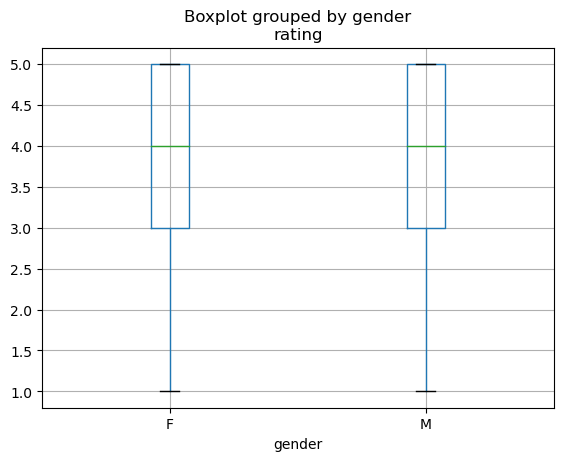

In [21]:
df3.boxplot("rating", by = "gender")

#### Analysis and Observation- Rating VS Gender

The above boxplot visually compares the distribution of ratings between female and male users. 

Both genders have provided very similar ratings, as indicated by the similar interquartile ranges, spanning from 3 to 5 for both genders. The whiskers shows the range of ratings and both genders have ratings that extend from the minimum of 1 to the maximum of 5. 

The similar distribution of ratings across both genders suggests that, in this dataset, gender may not be a significant factor influencing how users rate items. 

<AxesSubplot:title={'center':'rating'}, xlabel='helpfulness'>

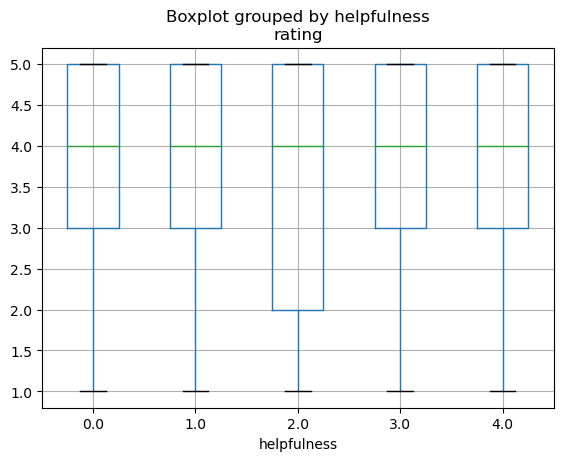

In [22]:
df3.boxplot("rating", by = "helpfulness")

#### Analysis and Observation- Rating VS Helpfulness

Above boxplot shows comparison between the distribution of ratings across different levels of helpfulness. 

There is an even distribution across most levels of helpfulness and the distributions of ratings are quite similar. 

The helpfulness rating for 2.0 shows a larger variance in ratings. The boxplot extends further than the rest of the ratings, indicating a wider range of ratings compared to other helpfulness levels. 

(array([1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(1, 0, 'Books'),
  Text(2, 0, 'Games'),
  Text(3, 0, 'Hotels & Travel'),
  Text(4, 0, 'Kids & Family'),
  Text(5, 0, 'Media'),
  Text(6, 0, 'Movies'),
  Text(7, 0, 'Online Stores & Services'),
  Text(8, 0, 'Personal Finance'),
  Text(9, 0, 'Restaurants & Gourmet')])

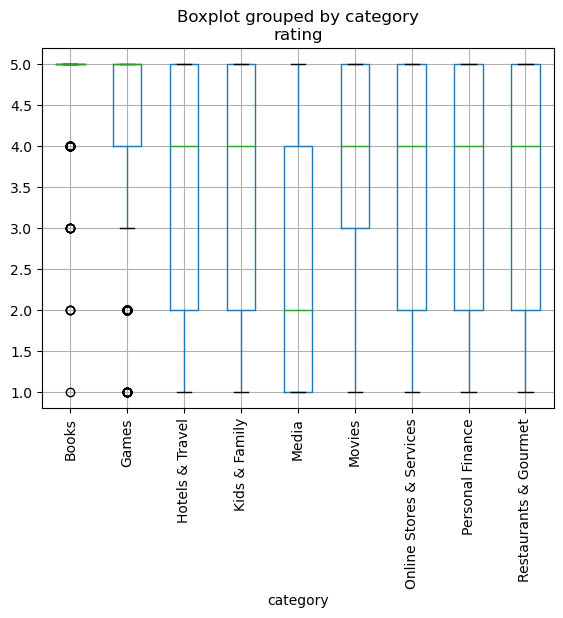

In [23]:
df3.boxplot("rating", by = "category")
plt.xticks(rotation = 90)

#### Analysis and Observation- Rating VS Categories

Games & Books had higher ratings overall, with Books showing a slightly higher median and more compact interquartile range, suggesting a more consistent rating. 

Hotels & Travel, Kids & Family, Online Stores & Services, Personal Finance and Restaurants & Gournmet has similar  dispersed rating scores from 2-5. While they cover a broader range of ratings, they do not reach as high as Books or Games. 

The category, Media had the lowest ratings overall with ratings ranging from 1-4, indicating less favorable ratings compared to others. 

### Q4. Detect and remove outliers

We may define outlier users, reviews and items with three rules (if a record meets one of the rules, it is regarded as an outlier):

1. reviews of which the helpfulness is no more than 2
2. users who rate less than 7 items
3. items that receives less than 11 ratings

Please remove the corresponding records in the csv file that involves outlier users, reviews and items. You need to follow the order of rules to perform data cleaning operations. After that, __print the length of the data__.

**4.1**

In [24]:
df_helpfulness = df3.drop(df3.index[(df3['helpfulness'] <= 2)])
df_helpfulness

,userId,timestamp,review,item,rating,helpfulness,gender,category,item_id,item_price,user_city
2,33,12700,AOL..I love you!!!!!!!!!!!!,AOL (America Online),5.0,4.0,F,Online Stores & Services,0,145.84,31
3,33,21000,EBAY!!! I LOVE YOU!!!! :-)*,eBay,5.0,4.0,F,Online Stores & Services,88,149.00,31
4,33,22300,Blair Witch...Oh Come On.......,Blair Witch Project,1.0,4.0,F,Movies,12,44.00,31
6,33,32100,Go down under Mateys!!!!!,Outback Steakhouse,5.0,4.0,F,Restaurants & Gourmet,50,25.00,31
9,4053,22304,The best on the web.,Amazon.com,5.0,3.0,F,Online Stores & Services,3,129.82,22
...,...,...,...,...,...,...,...,...,...,...,...
19992,10805,11900,R.I.P,MTV,1.0,4.0,F,Media,39,138.00,18
19993,10805,12000,Leave them be...,Teletubbies,5.0,4.0,F,Kids & Family,76,48.25,18
19994,10805,50500,"Thank you, Drive Thru Please",McDonald's,3.0,3.0,F,Restaurants & Gourmet,41,30.74,18
19995,10805,50600,The Upper Class Fast Food,Wendy's,2.0,3.0,F,Restaurants & Gourmet,84,69.00,18


In [25]:
print(len(df_helpfulness))

13643


The length of the data after removing reviews that are no more than 2 is 13,643.

**4.2**

In [26]:
df_userId = df_helpfulness.groupby("userId").count()["item"].reset_index(name = "count")
df_userId.head()

,userId,count
0,0,3
1,1,1
2,2,2
3,3,2
4,4,7


In [27]:
userlessthan7 = df_userId[df_userId["count"]<7]["userId"].tolist()

In [28]:
clean_users = df_helpfulness.drop(df_helpfulness.index[df_helpfulness["userId"].isin(userlessthan7)])
clean_users

,userId,timestamp,review,item,rating,helpfulness,gender,category,item_id,item_price,user_city
78,4081,71900,Not always McCrap,McDonald's,4.0,3.0,M,Restaurants & Gourmet,41,30.74,4
80,4081,72000,I dropped the chalupa even before he told me to,Taco Bell,1.0,4.0,M,Restaurants & Gourmet,74,108.30,4
81,4081,72000,The Wonderful World of Wendy,Wendy's,5.0,4.0,M,Restaurants & Gourmet,84,69.00,4
82,4081,100399,They actually did it,"South Park: Bigger, Longer & Uncut",5.0,3.0,M,Movies,68,143.11,4
83,4081,100399,Hey! Gimme some pie!,American Pie,3.0,3.0,M,Movies,6,117.89,4
...,...,...,...,...,...,...,...,...,...,...,...
19983,2445,22000,Great movie!,Austin Powers: The Spy Who Shagged Me,5.0,3.0,M,Movies,9,111.00,5
19985,2445,30700,Good food!,Outback Steakhouse,5.0,3.0,M,Restaurants & Gourmet,50,25.00,5
19988,2445,61500,Great movie!,Fight Club,5.0,3.0,M,Movies,26,97.53,5
19989,2445,100500,Awesome Game.,The Sims 2: Open for Business for Windows,5.0,4.0,M,Games,79,27.00,5


In [29]:
print(len(clean_users))

2741


The length of the data is 2741 after removing users who rated less than 7 items.

**4.2**

In [30]:
rating_count = clean_users.groupby("item").count()["rating"].reset_index(name = "count")
rating_count

,item,count
0,AOL (America Online),93
1,All Advantage,72
2,Alta Vista (by 1stUp),10
3,Amazon.com,18
4,American Airlines,19
...,...,...
84,Wendy's,35
85,What Lies Beneath,28
86,X-Men,48
87,X.com,19


In [31]:
itemlessthan11 = rating_count[rating_count["count"]<11]["item"].tolist()

In [32]:
df_clean = clean_users.drop(clean_users.index[clean_users["item"].isin(itemlessthan11)])
df_clean

,userId,timestamp,review,item,rating,helpfulness,gender,category,item_id,item_price,user_city
78,4081,71900,Not always McCrap,McDonald's,4.0,3.0,M,Restaurants & Gourmet,41,30.74,4
80,4081,72000,I dropped the chalupa even before he told me to,Taco Bell,1.0,4.0,M,Restaurants & Gourmet,74,108.30,4
81,4081,72000,The Wonderful World of Wendy,Wendy's,5.0,4.0,M,Restaurants & Gourmet,84,69.00,4
82,4081,100399,They actually did it,"South Park: Bigger, Longer & Uncut",5.0,3.0,M,Movies,68,143.11,4
83,4081,100399,Hey! Gimme some pie!,American Pie,3.0,3.0,M,Movies,6,117.89,4
...,...,...,...,...,...,...,...,...,...,...,...
19983,2445,22000,Great movie!,Austin Powers: The Spy Who Shagged Me,5.0,3.0,M,Movies,9,111.00,5
19985,2445,30700,Good food!,Outback Steakhouse,5.0,3.0,M,Restaurants & Gourmet,50,25.00,5
19988,2445,61500,Great movie!,Fight Club,5.0,3.0,M,Movies,26,97.53,5
19989,2445,100500,Awesome Game.,The Sims 2: Open for Business for Windows,5.0,4.0,M,Games,79,27.00,5


The length of the data is 2685 after removing items with less than 11 ratings.

In [33]:
df_clean.to_csv('The_E-commerce_Dataset_cleaned_data.csv', index=False)